# **딥 러닝 기반 회귀 모델**

## NVIIDA-GPU 세팅 확인

In [1]:
!nvidia-smi

Mon Jul  7 06:41:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## **데이터셋 불러오기**

In [2]:
# 사용할 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/train.csv")

### 데이터셋 살펴보기

In [4]:
df.head(10)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1.0,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2.0,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1.0,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1.0,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1.0,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1.0,1.000000,0.433013,0.410326,23.0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1.0,0.857143,0.433013,0.349927,11.0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1.0,1.114286,0.433013,0.444697,33.0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1.0,1.100000,0.433013,0.440952,36.0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1.0,1.085714,0.433013,0.437059,31.0


In [5]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,...,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,4.690395,83.484346,65.279007,63.440283,46.631358,1.329124,1.275053,140.424145,26.499047,51.037754,...,2.210224,2.296619,2.162159,1.501858,1.283862,1.496606,0.895375,0.614953,0.465848,64.418784
std,0.658368,11.869383,17.938939,8.307656,17.429480,0.141321,0.164769,27.329331,12.981186,10.459921,...,0.185923,0.162535,0.133325,0.129825,0.158393,0.869119,0.214550,0.308762,0.297795,28.250305
min,3.000000,39.633467,35.241077,22.005876,23.759674,0.608731,0.387216,89.019000,5.506330,39.209712,...,1.951220,1.861210,1.892210,0.848686,0.558648,1.000000,0.057143,0.400000,0.187942,1.700000
25%,4.000000,75.100250,51.434106,59.310096,35.027439,1.197273,1.183373,121.327600,15.426667,43.823354,...,2.079217,2.213364,2.065282,1.368922,1.201823,1.000000,0.800000,0.433013,0.271268,37.750000
50%,5.000000,79.400450,56.774156,60.515221,36.116612,1.383686,1.306314,122.906070,21.137272,46.482335,...,2.142857,2.213364,2.119268,1.557113,1.262734,1.000000,0.933333,0.433013,0.349927,72.100000
75%,5.000000,91.808100,81.126707,68.536357,65.372419,1.445824,1.365598,151.259600,36.501112,58.973428,...,2.264286,2.352158,2.226222,1.589027,1.367984,2.000000,1.052032,0.745356,0.446543,90.000000
max,7.000000,142.376700,152.464120,98.761740,137.387467,1.709748,1.717957,192.981000,137.643230,78.477440,...,3.180000,2.990698,2.870698,1.855373,1.748031,5.000000,2.300000,2.160247,1.766414,130.000000


In [6]:
df.shape

(885, 82)

## **입력 및 목표 (Target) 데이터 분리**

In [7]:
input_data, target_data = df.drop(columns=["critical_temp"], axis=1), df["critical_temp"]

### 입력 변수 명칭 확인

In [8]:
input_data.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

### 입력 변수 데이터 타입 확인

In [9]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               885 non-null    int64  
 1   mean_atomic_mass                 885 non-null    float64
 2   wtd_mean_atomic_mass             885 non-null    float64
 3   gmean_atomic_mass                885 non-null    float64
 4   wtd_gmean_atomic_mass            885 non-null    float64
 5   entropy_atomic_mass              885 non-null    float64
 6   wtd_entropy_atomic_mass          885 non-null    float64
 7   range_atomic_mass                885 non-null    float64
 8   wtd_range_atomic_mass            885 non-null    float64
 9   std_atomic_mass                  885 non-null    float64
 10  wtd_std_atomic_mass              885 non-null    float64
 11  mean_fie                         885 non-null    float64
 12  wtd_mean_fie          

### 목표 (Target) 변수 확인

In [10]:
target_data

,critical_temp
0,29.0
1,26.0
2,19.0
3,22.0
4,23.0
...,...
880,8.0
881,55.0
882,45.0
883,45.0


## **데이터셋 전처리**

### Min-Max Normalization

In [11]:
def MinMaxNorm(df) :
  return (df-df.min())/(df.max()-df.min())

In [12]:
input_data = MinMaxNorm(input_data)
target_data = MinMaxNorm(target_data)

In [13]:
input_data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,0.25,0.479944,0.192979,0.577880,0.108749,0.520486,0.507371,0.325956,0.198950,0.324926,...,0.2,0.248965,0.311782,0.334775,0.516781,0.426753,0.00,0.458599,0.018755,0.157821
1,0.50,0.516781,0.198573,0.666098,0.111213,0.763456,0.503884,0.325956,0.231999,0.200799,...,0.0,0.248965,0.023874,0.325471,0.703722,0.410779,0.25,0.477707,0.132058,0.177808
2,0.25,0.479944,0.193172,0.577880,0.108801,0.520486,0.442434,0.325956,0.228814,0.324926,...,0.2,0.260591,0.311782,0.347954,0.516781,0.395606,0.00,0.471338,0.018755,0.162660
3,0.25,0.479944,0.193075,0.577880,0.108775,0.520486,0.477234,0.325956,0.213882,0.324926,...,0.2,0.254778,0.311782,0.341355,0.516781,0.412135,0.00,0.464968,0.018755,0.160288
4,0.25,0.479944,0.192787,0.577880,0.108697,0.520486,0.557590,0.325956,0.169085,0.324926,...,0.2,0.237339,0.311782,0.321673,0.516781,0.451834,0.00,0.445860,0.018755,0.152595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,0.25,0.358994,0.176926,0.486011,0.103396,0.534544,0.502692,0.325956,0.194269,0.129362,...,0.2,0.241641,0.311782,0.326512,0.516781,0.443113,0.00,0.450573,0.018755,0.154575
881,0.25,0.358282,0.129540,0.486618,0.096353,0.536604,0.680902,0.310773,0.058738,0.117492,...,0.2,0.097828,0.311782,0.170222,0.516781,0.532517,0.00,0.356688,0.018755,0.044092
882,0.25,0.511719,0.167964,0.597521,0.108276,0.511844,0.713571,0.451565,0.041932,0.409955,...,0.2,0.097828,0.311782,0.170222,0.516781,0.532517,0.00,0.356688,0.018755,0.044092
883,0.25,0.524581,0.171185,0.605112,0.109052,0.508051,0.714961,0.502410,0.041932,0.447032,...,0.2,0.097828,0.311782,0.170222,0.516781,0.532517,0.00,0.356688,0.018755,0.044092


In [14]:
target_data

,critical_temp
0,0.212783
1,0.189400
2,0.134840
3,0.158223
4,0.166017
...,...
880,0.049104
881,0.415433
882,0.337490
883,0.337490


### 훈련 및 시험 데이터셋 분리

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
input_data, target_data = np.array(input_data), np.array(target_data)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.1, random_state=42)

In [18]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [19]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(716, 81) (716,)
(80, 81) (80,)
(89, 81) (89,)


## **PyTorch DataLoader Class 생성**

In [20]:
import torch
from torch.utils.data import Dataset

In [21]:
class MyDataLoader(Dataset) :
  def __init__(self, input_data:np.array, target_data:np.array) :
    # Inheritance
    super(MyDataLoader, self).__init__()

    # Initialize Variable
    self.input_data = input_data
    self.target_data = target_data

  def __getitem__(self, index) :
    input = self.input_data[index,:]
    target = self.target_data[index]

    input = torch.as_tensor(input)
    target = torch.as_tensor(target).unsqueeze(0)

    return {"input":input.float(), "target":target.float()}

  def __len__(self) :
    return len(self.input_data)

## **PyTorch 회귀 모델 생성**

In [22]:
from torch import nn
import torch.nn.functional as F

In [23]:
class MyModel(nn.Module) :
  def __init__(self, input_dim:int, target_dim:int, hidden_dim:int) :
    # Inheritance
    super(MyModel, self).__init__()

    # Create MLP Layer Instance
    self.layer0 = nn.Linear(input_dim, hidden_dim)
    self.layer1 = nn.Linear(hidden_dim, hidden_dim*2)
    self.layer2 = nn.Linear(hidden_dim*2, hidden_dim*4)
    self.layer3 = nn.Linear(hidden_dim*4, hidden_dim*2)
    self.layer4 = nn.Linear(hidden_dim*2, hidden_dim)
    self.layer5 = nn.Linear(hidden_dim, target_dim)

  def forward(self, input) :
    output = F.relu(self.layer0(input))
    output = F.relu(self.layer1(output))
    output = F.relu(self.layer2(output))
    output = F.relu(self.layer3(output))
    output = F.relu(self.layer4(output))
    output = self.layer5(output)

    return output

## **훈련 하이퍼파라미터 생성**

In [24]:
opt = {"seed":42,
       "batch_size":128,
       "lr":1e-3,
       "epochs":50,
       "cuda":torch.cuda.is_available()}

## **딥 러닝 모델 훈련**

In [25]:
# 사용할 라이브러리 불러오기
from torch.utils.data import DataLoader
from torch import optim

from tqdm import tqdm

### Seed 고정

In [26]:
import random

In [27]:
def fix_seed(seed) :
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

In [28]:
fix_seed(opt["seed"])

### **DataLoader 인스턴스 생성**

In [29]:
train_dataloader = DataLoader(MyDataLoader(x_train, y_train), batch_size=opt["batch_size"], shuffle=True, drop_last=True)
valid_dataloader = DataLoader(MyDataLoader(x_valid, y_valid), batch_size=opt["batch_size"], shuffle=False, drop_last=False)

### **딥 러닝 모델 인스턴스 생성**

In [30]:
fix_seed(opt["seed"])

In [31]:
model = MyModel(x_train.shape[1], 1, 64)

### **디바이스 (CPU 또는 CUDA) 부여**

In [32]:
if opt["cuda"] :
  model = model.cuda()

In [33]:
next(model.parameters()).device

device(type='cuda', index=0)

### **딥 러닝 모델 요약**

In [34]:
from torchsummary import summary

In [35]:
summary(model, (1, x_train.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]           5,248
            Linear-2               [-1, 1, 128]           8,320
            Linear-3               [-1, 1, 256]          33,024
            Linear-4               [-1, 1, 128]          32,896
            Linear-5                [-1, 1, 64]           8,256
            Linear-6                 [-1, 1, 1]              65
Total params: 87,809
Trainable params: 87,809
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.33
Estimated Total Size (MB): 0.34
----------------------------------------------------------------


### **Optimizer 인스턴스 생성**

In [36]:
optimizer = optim.Adam(model.parameters(), lr=opt["lr"])

### **손실 함수 인스턴스 생성**

In [37]:
criterion = nn.MSELoss()

### **훈련 과정 요약을 위한 Average Meter 인스턴스 생성**

In [38]:
class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val*n
        self.count += n
        self.avg = self.sum / self.count

In [39]:
train_loss, valid_loss = AverageMeter(), AverageMeter()

### **훈련 결과 저장을 위한 Python List 인스턴스 생성**

In [40]:
train_loss_list, valid_loss_list = [], []
best_loss = torch.inf

### **딥 러닝 모델 훈련 진행**

In [50]:
for epoch in range(1, opt["epochs"]+1) :
    train_bar = tqdm(train_dataloader)
    train_loss.reset()

    for data in train_bar :
      input, target = data["input"], data["target"]
      if opt["cuda"] :
        input, target = input.cuda(), target.cuda()

      optimizer.zero_grad()
      pred = model(input)
      loss = criterion(pred, target)
      loss.backward()
      optimizer.step()

      train_loss.update(loss.item(), opt["batch_size"])
      train_bar.set_description(desc=f"[{epoch}/{opt['epochs']}] [Train] < Loss:{train_loss.avg:.15f} >")

    train_loss_list.append(train_loss.avg)

    valid_bar = tqdm(valid_dataloader)
    valid_loss.reset()

    for data in valid_bar :
      input, target = data["input"], data["target"]
      if opt["cuda"] :
        input, target = input.cuda(), target.cuda()

      model.eval()
      with torch.no_grad() :
        pred = model(input)
        loss = criterion(pred, target)

        valid_loss.update(loss.item(), opt["batch_size"])
        valid_bar.set_description(desc=f"[{epoch}/{opt['epochs']}] [Valid] < Loss:{valid_loss.avg:.15f} >")

    valid_loss_list.append(valid_loss.avg)

    if valid_loss.avg < best_loss :
      best_loss = valid_loss.avg
      torch.save(model.state_dict(), "best_model.pth")

    torch.save(model.state_dict(), "latest_model.pth")

[50/50] [Valid] < Loss:nan >: 100%|██████████| 1/1 [00:00<00:00, 138.67it/s]


In [44]:
print(f"Best MSE Loss : {best_loss:.12f}")

Best MSE Loss : inf


### **훈련 및 검증 손실 함수 시각화**

ValueError: x and y must have same first dimension, but have shapes (50,) and (150,)

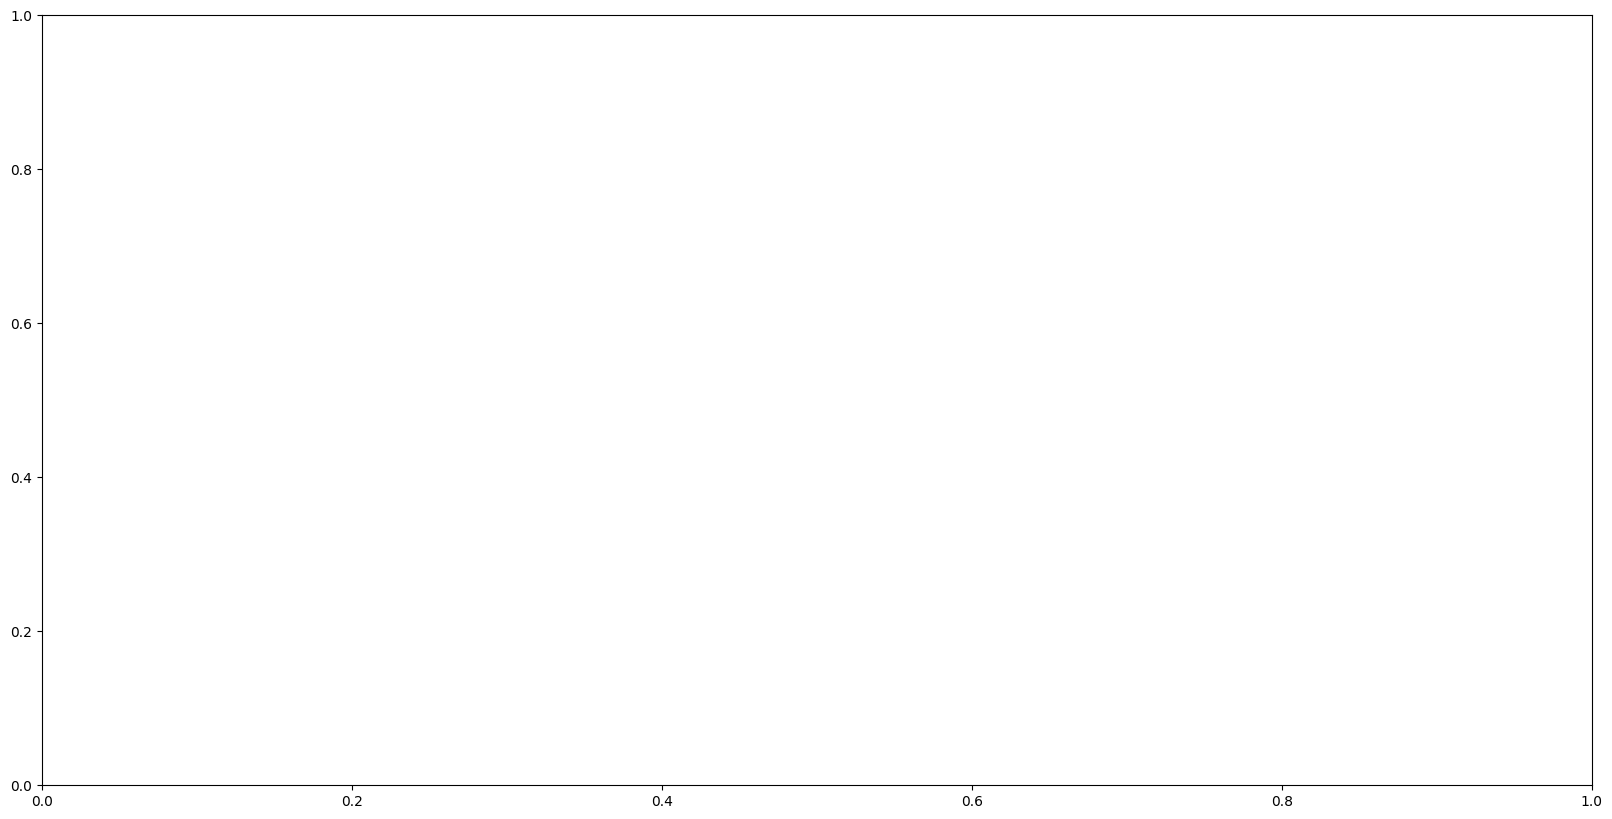

In [47]:
plt.figure(figsize=(20,10))

plt.plot(np.arange(0, opt["epochs"], 1), train_loss_list, label="Training Loss")
plt.plot(np.arange(0, opt["epochs"], 1), valid_loss_list, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend(loc="best")

plt.show()

## **저장된 모델 가중치 불러오기**

In [48]:
weights = torch.load("/content/best_model.pth")

FileNotFoundError: [Errno 2] No such file or directory: '/content/best_model.pth'

In [ ]:
model = MyModel(x_train.shape[1], 1, 64)
model.load_state_dict(weights)
if opt["cuda"] :
  model = model.cuda()

## **시험 데이터셋 추론 진행**

In [ ]:
x_test_tensor = torch.as_tensor(x_test).float()

pred_list = []

model.eval()

with torch.no_grad() :
  with tqdm(total=x_test_tensor.shape[0]) as p_bar :
    for input_data in x_test_tensor :
      input_data = input_data.cuda()

      pred = model(input_data)
      pred_list.append(pred.detach().cpu().item())

      p_bar.update()

### Bar Chart를 사용하여 결과 비교

In [ ]:
def plot_bar_chart(y_test, y_test_hat) :
  fig, ax = plt.subplots(figsize=(20,10))
  idx = np.asarray([i for i in range(50)])
  width = 0.2

  ax.bar(idx, y_test[:50], width=width)
  ax.bar(idx+width, y_test_hat[:50], width=width)
  ax.set_xticks(idx)
  ax.legend(["Ground Truth", "Prediction"])
  ax.set_xlabel("# samples")
  ax.set_ylabel("Value")

  fig.tight_layout()
  plt.show()

In [ ]:
plot_bar_chart(y_test, pred_list)

### **MSE 계산**

In [ ]:
def MSE(y_hat:np.array, y_target:np.array) :
  loss = np.mean(np.power(y_hat-y_target, 2))
  return loss

In [ ]:
MSE(np.array(pred_list), np.array(y_test))

## **추상화된 딥 러닝 모델 훈련 코드 작성**

In [ ]:
def train(opt, dataset, criterion) :
  fix_seed(opt["seed"])

  train_dataloader = DataLoader(MyDataLoader(dataset["x_train"], dataset["y_train"]), batch_size=opt["batch_size"], shuffle=True, drop_last=True)
  valid_dataloader = DataLoader(MyDataLoader(dataset["x_valid"], dataset["y_valid"]), batch_size=opt["batch_size"], shuffle=False, drop_last=False)

  fix_seed(opt["seed"])
  model = MyModel(x_train.shape[1], 1, 64)
  if opt["cuda"] :
    model = model.cuda()

  summary(model, (1, dataset["x_train"].shape[1]))

  optimizer = optim.Adam(model.parameters(), lr=opt["lr"])

  train_loss, valid_loss = AverageMeter(), AverageMeter()
  train_loss_list, valid_loss_list = [], []
  best_loss = torch.inf

  for epoch in range(1, opt["epochs"]+1) :
    train_bar = tqdm(train_dataloader)
    train_loss.reset()

    for data in train_bar :
      input, target = data["input"], data["target"]
      if opt["cuda"] :
        input, target = input.cuda(), target.cuda()

      optimizer.zero_grad()
      pred = model(input)
      loss = criterion(pred, target)
      loss.backward()
      optimizer.step()

      train_loss.update(loss.item(), opt["batch_size"])
      train_bar.set_description(desc=f"[{epoch}/{opt['epochs']}] [Train] < Loss:{train_loss.avg:.6f} >")

    train_loss_list.append(train_loss.avg)

    valid_bar = tqdm(valid_dataloader)
    valid_loss.reset()

    for data in valid_bar :
      input, target = data["input"], data["target"]
      if opt["cuda"] :
        input, target = input.cuda(), target.cuda()

      model.eval()
      with torch.no_grad() :
        pred = model(input)
        loss = criterion(pred, target)

        valid_loss.update(loss.item(), opt["batch_size"])
        valid_bar.set_description(desc=f"[{epoch}/{opt['epochs']}] [Valid] < Loss:{valid_loss.avg:.6f} >")

    valid_loss_list.append(valid_loss.avg)

    if valid_loss.avg < best_loss :
      best_loss = valid_loss.avg
      torch.save(model.state_dict(), "best_model.pth")

    torch.save(model.state_dict(), "latest_model.pth")

  return train_loss_list, valid_loss_list

## **MAE vs. MSE 손실 함수**

In [ ]:
x = np.arange(-1.5, 1.5, 1e-2)
mae = np.abs(x)
mse = np.power(x, 2)

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(x, mae, label="MAE Loss")
plt.plot(x, mse, label="MSE Loss")

plt.xlabel("Input")
plt.ylabel("Loss")
plt.legend(loc="best")

plt.show()

## **딥 러닝 모델 훈련 진행**

In [ ]:
train_loss_list, valid_loss_list = train(opt,
                                         {"x_train":x_train, "y_train":y_train, "x_valid":x_valid, "y_valid":y_valid},
                                         nn.L1Loss())

### 훈련 및 검증 손실 함수 시각화

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(np.arange(0, opt["epochs"], 1), train_loss_list, label="Training Loss")
plt.plot(np.arange(0, opt["epochs"], 1), valid_loss_list, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend(loc="best")

plt.show()

## **추상화된 딥 러닝 모델 추론 코드 작성**

In [ ]:
def inference(opt, input_data, model_path) :
  weights = torch.load(model_path)

  model = MyModel(x_train.shape[1], 1, 64)
  model.load_state_dict(weights)
  if opt["cuda"] :
    model = model.cuda()

  input_data_tensor = torch.as_tensor(input_data).float()

  pred_list = []

  model.eval()

  with torch.no_grad() :
    with tqdm(total=input_data.shape[0]) as p_bar :
      for input_data in input_data_tensor :
        if opt["cuda"] :
          input_data = input_data.cuda()

        pred = model(input_data)
        pred_list.append(pred.detach().cpu().item())

        p_bar.update()

  return pred_list

### 시험 데이터셋 추론 진행

In [ ]:
pred_list = inference(opt, x_test, "/content/best_model.pth")

### Bar Chart를 사용하여 결과 비교

In [ ]:
plot_bar_chart(y_test, pred_list)

### **MSE 계산**

In [ ]:
MSE(np.array(pred_list), np.array(y_test))